<h1><center><font size=8>AIML - Project 2 - Cars4U</center></font></h1>
<center><img src="https://images.cars.com/cldstatic/wp-content/uploads/202201-chip-shortage-used-cars-scaled.jpg" width="500" height="400"></center>



### **Objective:**
To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.


Come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it.


### **Data Description:**
The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below.

Data Dictionary

* S.No.: Serial number
* Name: Name of the car which includes brand name and model name
* Location: Location in which the car is being sold or is available for purchase (cities)
* Year: Manufacturing year of the car
* Kilometers_driven: The total kilometers (a unit used to measure length or distance) driven in the car by the previous owner(s)
* Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
* Transmission: The type of transmission used by the car (Automatic/Manual)
* Owner: Type of ownership
* Mileage: The standard mileage offered by the car company in kmpl or km/kg
* Engine: The displacement volume of the engine in CC
* Power: The maximum power of the engine in bhp
* Seats: The number of seats in the car
* New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)
* Price: The price of the used car in INR Lakhs* 

### **Importing the necessary libraries**

In [233]:
# this will help in making the Python code more structured automatically (good coding practice)
!pip install nb_black
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

### **Loading the dataset**

In [234]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<IPython.core.display.Javascript object>

In [235]:
# Read data from CSV file.
data = pd.read_csv('/content/drive/My Drive/Python Learning/Projects/Project2/used_cars_data.csv')

<IPython.core.display.Javascript object>

In [236]:
# copying data to another variable to avoid any changes to original data
df = data.copy()

<IPython.core.display.Javascript object>

### **Define the problem and perform an Exploratory Data Analysis**

#### **Understanding the structure of the data**
- Overview of the dataset shape, datatypes - Statistical summary and check for missing values

In [237]:
# checking the shape of the data
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")  # f-string

There are 7253 rows and 14 columns.


<IPython.core.display.Javascript object>

In [238]:
# Checking 10 random values from data set
np.random.seed(1)
df.sample(n=10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,35.29,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,86.97,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,8.23,6.34
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05,24.82
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,86.97,32.00
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,67.10,20.77
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,10.25,2.50
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.0,9.36,8.20


<IPython.core.display.Javascript object>

* The `Mileage` and `Power`column value has units. Mostly same unit for all rows.

In [239]:
# Find if there are any duplicates in dataset
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

* No duplicate values in dataset.

In [240]:
#Checking data types for columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


<IPython.core.display.Javascript object>

* The `S. No.` Column may not be required and can be dropped from dataset.
* `Mileage` `Engine` and `Power`   column are object type. Can be converted to float/int. 

In [241]:
# checking for missing values in the data.
df.isnull().sum().sort_values(ascending=False)

Price                1234
Power                 175
Seats                  53
Engine                 46
Mileage                 2
S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
New_Price               0
dtype: int64

<IPython.core.display.Javascript object>

* There are missing values in few columns.
* Since `Price` is target variable, after initial evaluation we may drop all the rows with missing Pricefrom dataset.

In [242]:
# Checking statistical summary of data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253.0,NaN,NaN,NaN,3626.0,2093.905084,0.0,1813.0,3626.0,5439.0,7252.0
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

- *Diesel cars with Manual transmissions are top used cars in market.*
- *Kilometers_Driven has wide range(171 to 6500000.0). Max value for Kilometers_Driven seems outlier*
- *Mileage, Engine, Power and seats datatype needs coversion for better analysis*


#### **Exploratory Data Analysis**
* Analysis of spread and distribution of every feature in the dataset.

##### **Processing Columns**

- *For Data Analysis modifying sttructure of data for better analysis. E.g. Mileage, Engine and Power units can be dropped to treat them as numeric values and analyze data accordingly*

In [243]:
# S.No. and Name columns are not required for analysis. These columns doesn't influence target variable -  Price.
df.drop(['S.No.', 'Name'],axis=1,inplace=True) 

<IPython.core.display.Javascript object>

In [244]:
"""This funtion will split the input and only return the first index from input"""
def firstValueAfterSplit(colname):
  if isinstance(colname, str):
    splt = colname.split(" ")
    return splt[0] # return only first index from input
  else:
    return np.nan

<IPython.core.display.Javascript object>

In [245]:
# Mileage, Engine and Power may not require units. Dropping units will help in numeric data analysis. 
colsToTransform = ['Mileage', 'Engine', 'Power']
for colName in colsToTransform:
  df[colName] = df[colName].apply(firstValueAfterSplit)

<IPython.core.display.Javascript object>

- *Changing data types of 'Mileage','Engine','Power', 'Seats' from string to int/float. This will allow Data analysis easy*

In [246]:
df['Mileage'] = df['Mileage'].astype(float, errors='ignore')

<IPython.core.display.Javascript object>

In [247]:
df['Engine'] = df['Engine'].astype(float).astype("int64", errors='ignore')

<IPython.core.display.Javascript object>

In [248]:
df['Power'] = df['Power'].astype(float, errors='ignore')

<IPython.core.display.Javascript object>

In [249]:
df['Seats'] = df['Seats'].astype(float).astype(int, errors='ignore')

<IPython.core.display.Javascript object>

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7253 non-null   object 
 1   Year               7253 non-null   int64  
 2   Kilometers_Driven  7253 non-null   int64  
 3   Fuel_Type          7253 non-null   object 
 4   Transmission       7253 non-null   object 
 5   Owner_Type         7253 non-null   object 
 6   Mileage            7251 non-null   float64
 7   Engine             7207 non-null   float64
 8   Power              7078 non-null   float64
 9   Seats              7200 non-null   float64
 10  New_Price          7253 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 680.1+ KB


<IPython.core.display.Javascript object>

In [251]:
# Checking statistical data after making changes to cloumn datatypes
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.00,2014.00,2016.00,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.00,53416.00,73000.00,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.17,18.16,21.10,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.00,1493.00,1968.00,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.00,94.00,138.10,616.00
Seats,7200.0,5.279722,0.811660,0.00,5.00,5.00,5.00,10.00
New_Price,7253.0,21.307322,24.256314,3.91,7.88,11.30,21.69,375.00
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.95,160.00


<IPython.core.display.Javascript object>

* There is huge difference between min and max Price for the car.
* New_Price of the car in most cases is more than twice for used car.
* Average year of build for most cars is around 2013/2014

##### **Univariate Data Analysis**
* Analysis of spread and distribution of every feature in the dataset.

###### **Exploring numerical values**

In [252]:
# Defining the function for creating boxplot and hisogram 
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
   
    
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots
    
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="pink")  # boxplot will be created and a star will indicate the mean value of the colum
   
    if bins:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="lightgreen")
    else: 
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, color="lightblue")  # For histogram
    
    ax_hist2.axvline(data[feature].mean(), color="red", linestyle="--")  # Add mean to the histogram
    ax_hist2.text(data[feature].mean()+0.15,30,'Mean = '+str(round(data[feature].mean(),1)),rotation=90, fontsize=10)
    
    ax_hist2.axvline(data[feature].median(), color="green", linestyle="-")  # Add median to the histogram
    ax_hist2.text(data[feature].median()+0.15,30,'Median = '+str(round(data[feature].median(),1)),rotation=90, fontsize=10)

<IPython.core.display.Javascript object>

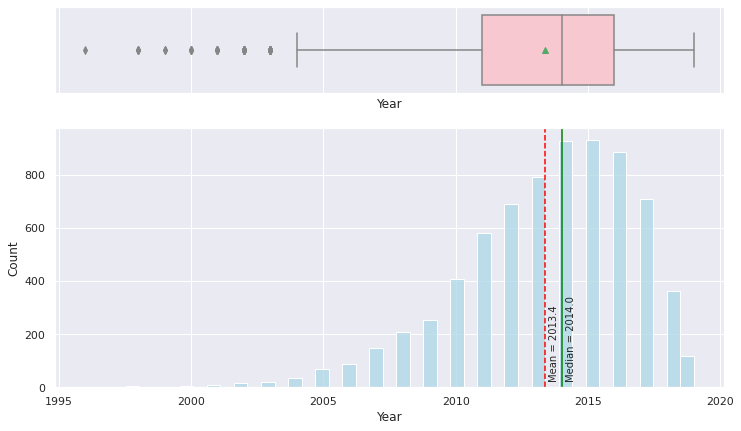

<IPython.core.display.Javascript object>

In [253]:
# Observations on Year for demographic
histogram_boxplot(df,'Year')

- *Mileage seems to be uniformally distributes. Meddian and mean are pretty close. 2013/2014*

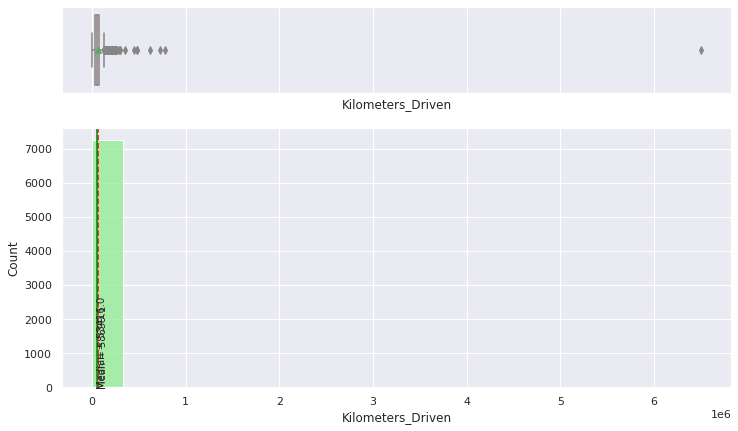

<IPython.core.display.Javascript object>

In [254]:
# Observations on Kilometers_Driven for demographic
histogram_boxplot(df,'Kilometers_Driven',bins=20)

- *Kilometers_Driven has max value which is much more than 75%.*

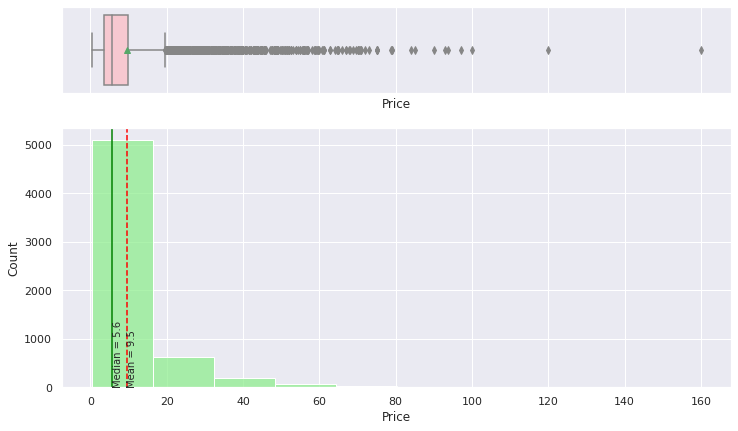

<IPython.core.display.Javascript object>

In [255]:
# Observations on Price for demographic
histogram_boxplot(df,'Price', bins=10)

- *Price is right scewed. There are many outliers based on boxplot*

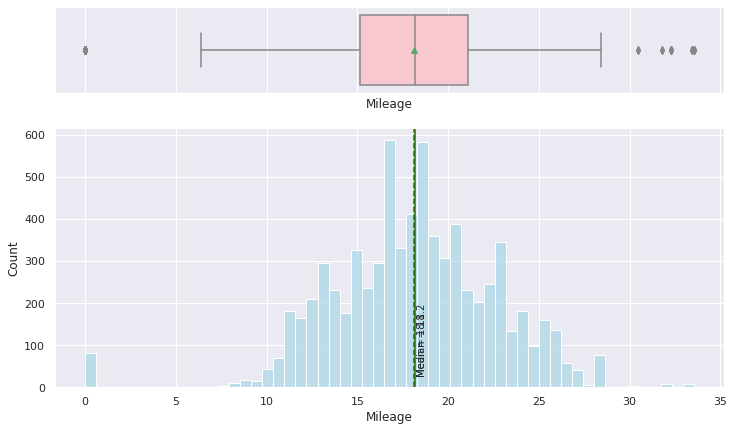

<IPython.core.display.Javascript object>

In [256]:
# Observations on Mileage for demographic
histogram_boxplot(df,'Mileage')

- *Mileage seems to have normal distribution.*

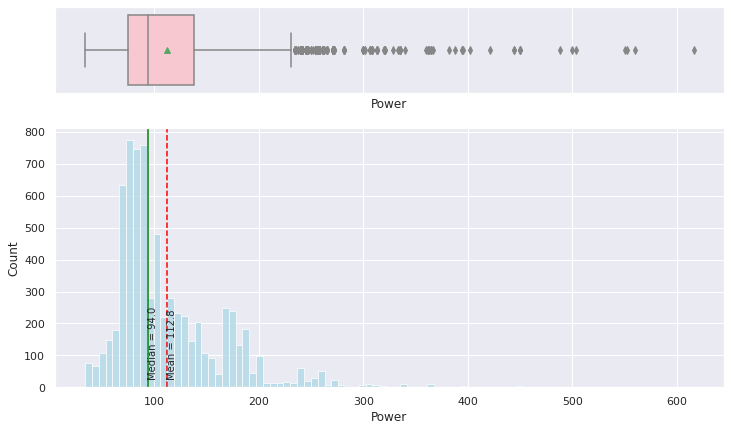

<IPython.core.display.Javascript object>

In [257]:
# Observations on Power for demographic
histogram_boxplot(df,'Power')

- *Power for Engone has many outliers.*

###### **Exploring Categorical values**

In [258]:
# Making a list of all categorical variables
cat_cols =  ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats']

# Printing the count of unique categorical levels in each column
for column in cat_cols:
    print(df[column].value_counts())
    print("-" * 50)

Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
--------------------------------------------------
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64
--------------------------------------------------
Manual       5204
Automatic    2049
Name: Transmission, dtype: int64
--------------------------------------------------
First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64
--------------------------------------------------
5.0     6047
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
0.0        1
Name: Seats, dtype: int64
--------------------------------------------------


<IPython.core.display.Javascript object>

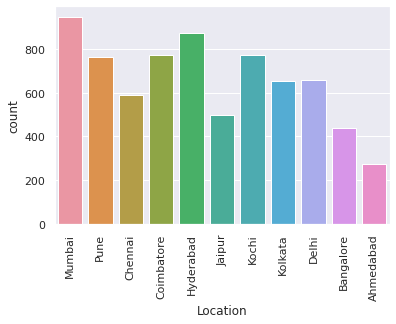

<IPython.core.display.Javascript object>

In [259]:
#Observation with Product
sns.countplot(data=df,x='Location')
plt.xticks(rotation=90)
plt.show()

- *Mumbai has highest numbers of used cars for sell. Other cities are also showing significant number*

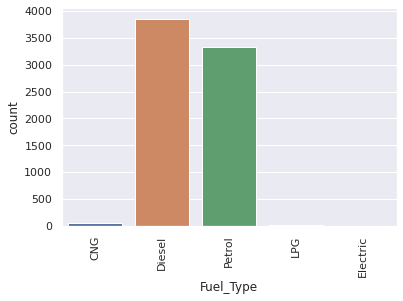

<IPython.core.display.Javascript object>

In [260]:
#Observation with Fuel_Type
sns.countplot(data=df,x='Fuel_Type')
plt.xticks(rotation=90)
plt.show()

- *Diesel and Petrol cars have max values in Fuel Type. There are very few cars with CNG and LPG*

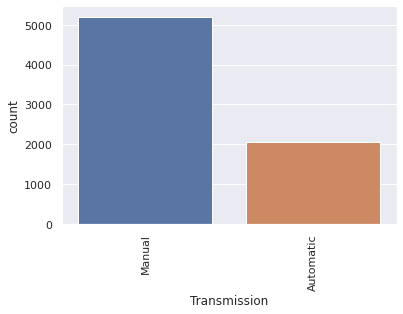

<IPython.core.display.Javascript object>

In [261]:
#Observation with Transmission
sns.countplot(data=df,x='Transmission')
plt.xticks(rotation=90)
plt.show()

- *There are more cars with Manual Transmission*

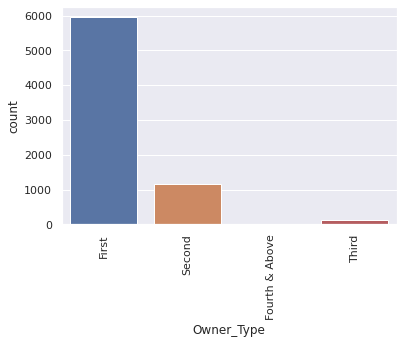

<IPython.core.display.Javascript object>

In [262]:
#Observation with Owner_Type
sns.countplot(data=df,x='Owner_Type')
plt.xticks(rotation=90)
plt.show()

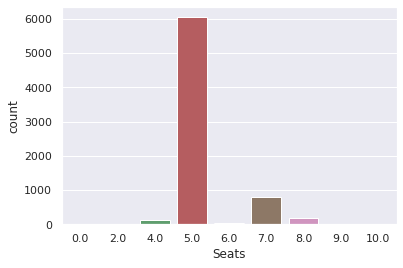

<IPython.core.display.Javascript object>

In [263]:
#Observation with Seats
sns.countplot(data=df,x='Seats')
plt.show()

- *Most of used cars owners in the market are First time owners.*

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7253 non-null   object 
 1   Year               7253 non-null   int64  
 2   Kilometers_Driven  7253 non-null   int64  
 3   Fuel_Type          7253 non-null   object 
 4   Transmission       7253 non-null   object 
 5   Owner_Type         7253 non-null   object 
 6   Mileage            7251 non-null   float64
 7   Engine             7207 non-null   float64
 8   Power              7078 non-null   float64
 9   Seats              7200 non-null   float64
 10  New_Price          7253 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 680.1+ KB


<IPython.core.display.Javascript object>

##### **Multivariate Data Analysis**
* Analysis of interaction between features, in the dataset.

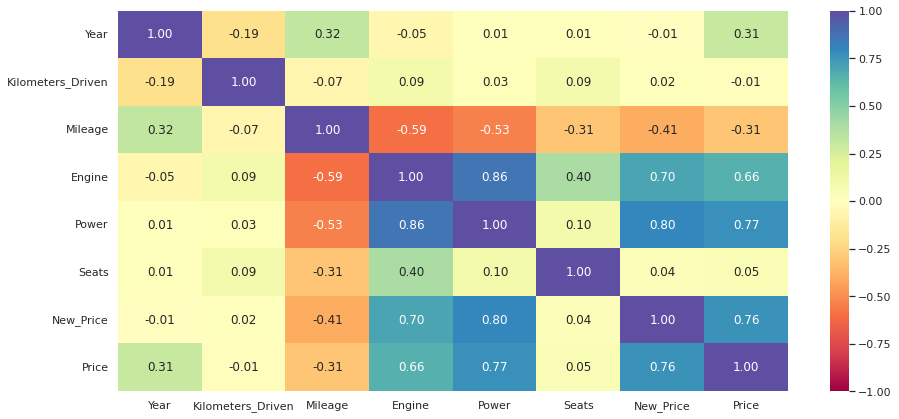

<IPython.core.display.Javascript object>

In [265]:
# Check for correlation among numerical variables
num_var = ['Year','Kilometers_Driven','Mileage','Engine','Power', 'Seats','New_Price', 'Price']

corr = df[num_var].corr()

# plot the heatmap

plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* Price has high positive correlation with Power and Engine.
* Price has negative correlation with Mileage. If the car is driven more, value of the car is depreciated.
* Interesting - Kilometers_Driven is very minor negative correlation with Price. This needs to be evaluated. 

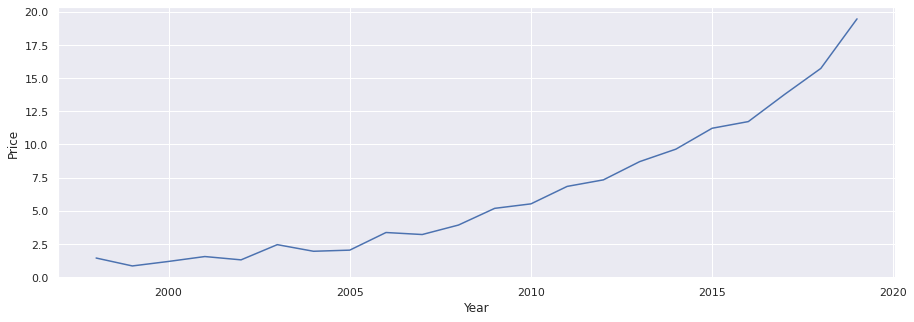

<IPython.core.display.Javascript object>

In [266]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df,x='Year',y='Price',ci=None)
plt.show()

* Cars built in recent years are pricier than older cars.

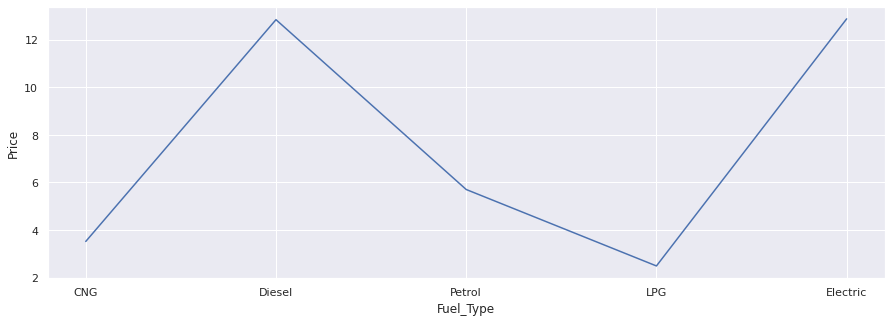

<IPython.core.display.Javascript object>

In [267]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df,x='Fuel_Type',y='Price',ci=None)
plt.show()

* Diesel and electrc cars have higher resell values compared to Petrol, CNG and LPG

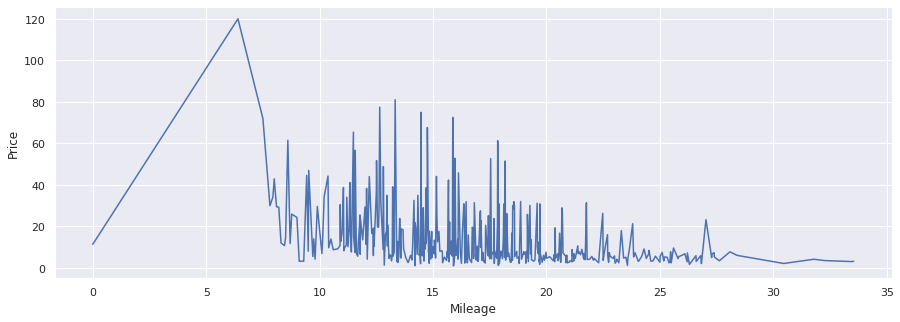

<IPython.core.display.Javascript object>

In [268]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df,x='Mileage',y='Price',ci=None)
plt.show()

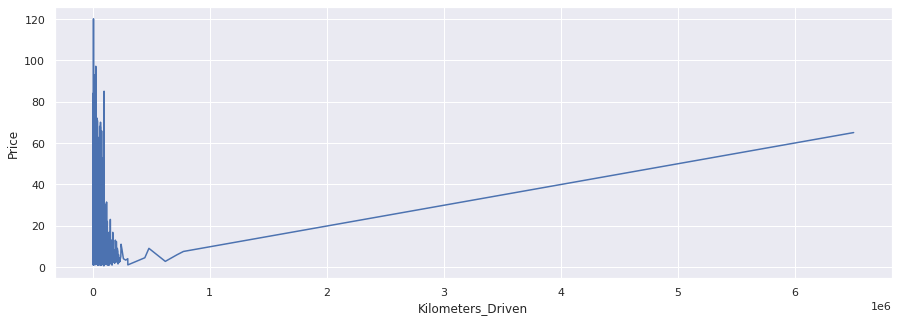

<IPython.core.display.Javascript object>

In [269]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df,x='Kilometers_Driven',y='Price',ci=None)
plt.show()

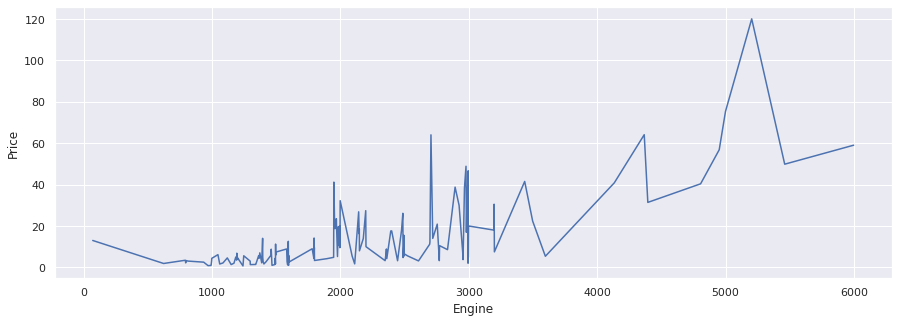

<IPython.core.display.Javascript object>

In [270]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df,x='Engine',y='Price',ci=None)
plt.show()

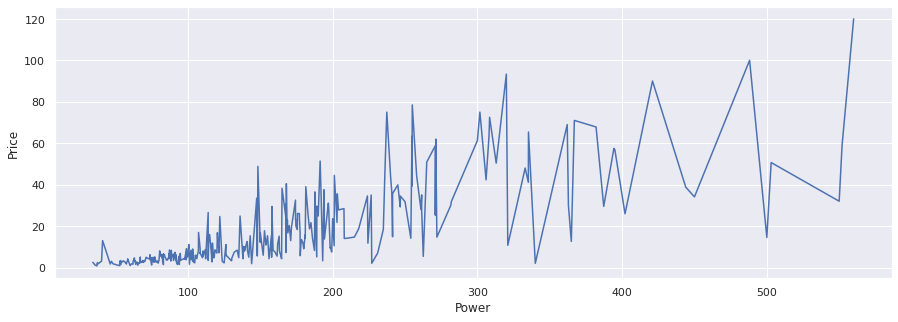

<IPython.core.display.Javascript object>

In [271]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df,x='Power',y='Price',ci=None)
plt.show()

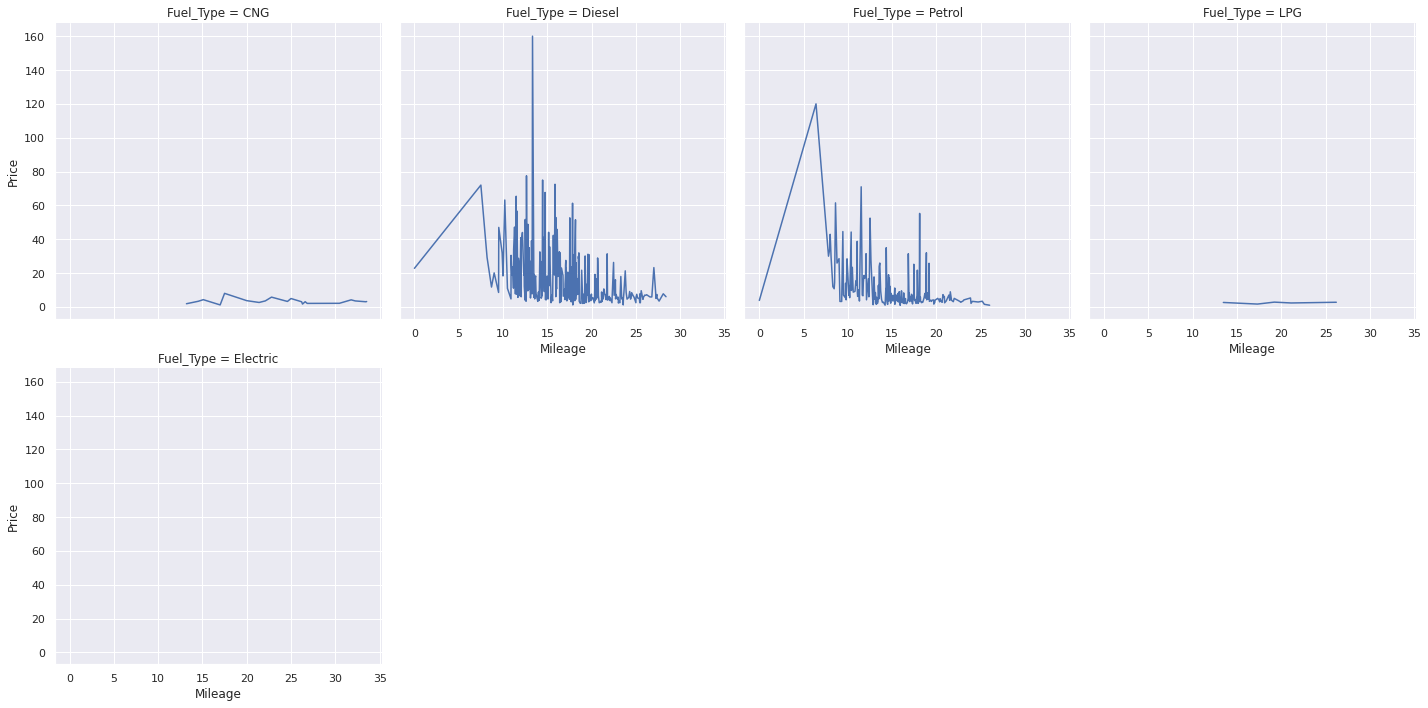

<IPython.core.display.Javascript object>

In [272]:
sns.relplot(data=df,x='Mileage',y='Price',col='Fuel_Type',kind='line', ci=None, col_wrap=4)
plt.show()
# double click on the plot to zoom in

#### <a id='link1'>Summary of EDA</a>

**Data Cleaning:**

- The `S.No.` and `Name`  are not required for analysis. These columns doesn't influence target variable -  Price.
- `Mileage`, `Engine` and `Power` does not require units. Dropping units will help in numeric data analysis.
- Changing data types of `Mileage`, `Engine`, `Power` and `Seats` from string to int/float. This will allow Data analysis easy


**Observations from EDA:**

- `Price`: Price has high positive correlation with Power and Engine. Price also has missing values. Since this is target variable, all the rows with missing values will be deleted. This may impact correlation metrics.
- Diesel and electrc cars have higher resell values compared to Petrol, CNG and LPG
- Cars built in recent years are pricier than older cars.
* There is huge difference between min and max Price for the car.
* New_Price of the car in most cases is more than twice for used car.


# **Data Preprocessing**

In [273]:
df.head(10)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,5.51,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,16.06,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.27,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,53.14,17.74
5,Hyderabad,2012,75000,LPG,Manual,First,21.10,814.0,55.20,5.0,10.25,2.35
6,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,9.47,3.50
7,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,21.00,17.50
8,Pune,2013,64430,Diesel,Manual,First,20.54,1598.0,103.60,5.0,13.23,5.20
9,Chennai,2012,65932,Diesel,Manual,Second,22.30,1248.0,74.00,5.0,7.63,1.95


<IPython.core.display.Javascript object>

## **Handling Missing values**

It is generally preferred to impute the missing values in the independent variables using a suitable strategy.
 - For an unskewed numerical variable, the mean of the variable can be used to impute missing values.
 - For a skewed numerical variable, the median of the variable can be used to impute missing values.
 - For a categorical variable, the most frequent value can be used to impute missing values.

In [274]:
# checking for missing values in the data after dropping missing values for target variable.
df.isnull().sum().sort_values(ascending=False)

Price                1234
Power                 175
Seats                  53
Engine                 46
Mileage                 2
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
New_Price               0
dtype: int64

<IPython.core.display.Javascript object>

###Handle missing values for Price.

In [275]:
# Since `Price` is target variable, dropping rows with missing Price from dataset.
# Dropping null values from
df.dropna(subset=["Price"], inplace=True)
# let us reset the dataframe index
df.reset_index(inplace=True, drop=True)

<IPython.core.display.Javascript object>

###Handle missing values for Mileage.

In [276]:
# Check Mileage empty rows. 
df[df['Mileage'].isnull()]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58,13.00
4904,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,24.01,12.75


<IPython.core.display.Javascript object>

In [277]:
# Since there are only 2 rows with missing Mileage values, dropping these rows. 
# Dropping null values from
df.dropna(subset=["Mileage"], inplace=True)
# let us reset the dataframe index
df.reset_index(inplace=True, drop=True)

<IPython.core.display.Javascript object>

In [278]:
# After removing missing values for Mileage
df.isnull().sum().sort_values(ascending=False)

Power                143
Seats                 42
Engine                36
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
New_Price              0
Price                  0
dtype: int64

<IPython.core.display.Javascript object>

###Handle missing values for Seats.

In [279]:
data['Seats'].value_counts(ascending = False, dropna = False)

5.0     6047
7.0      796
8.0      170
4.0      119
NaN       53
6.0       38
2.0       18
10.0       8
9.0        3
0.0        1
Name: Seats, dtype: int64

<IPython.core.display.Javascript object>

In [280]:
#Since Seats has finite numbers, treating it as categorical value and using most frequent value to impute missing values.
df["Seats"].fillna(5.0, inplace=True)

<IPython.core.display.Javascript object>

In [281]:
# After removing missing values for Seats
df.isnull().sum().sort_values(ascending=False)

Power                143
Engine                36
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Seats                  0
New_Price              0
Price                  0
dtype: int64

<IPython.core.display.Javascript object>

###Handle missing values for Engine and Power.

In [282]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,5.51,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,16.06,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.27,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,53.14,17.74


<IPython.core.display.Javascript object>

In [283]:
# Replacing missing values in both Power and Engine based on Median. Since values for Engine and Power depdends on Price (and vice versa) using Price to decide engine and Power
#df[["Power", "Engine"]] = df.groupby(["Price"])[["Power", "Engine"]].transform(lambda x: x.fillna(x.median()))

<IPython.core.display.Javascript object>

In [284]:
df["Power"].fillna(df.Power.median(), inplace=True)
df["Engine"].fillna(df.Engine.median(), inplace=True)
# After removing missing values for Seats
df.isnull().sum().sort_values(ascending=False)

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

<IPython.core.display.Javascript object>

In [285]:
# Checking data size after dropping values
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.") # from 7253 to 6017

There are 6017 rows and 12 columns.


<IPython.core.display.Javascript object>

In [286]:
# saving the dataset with all the missing values treated
df.to_csv('/content/drive/My Drive/Python Learning/Projects/Project2/used_cars_data_NoMissing.csv',index=False)

<IPython.core.display.Javascript object>

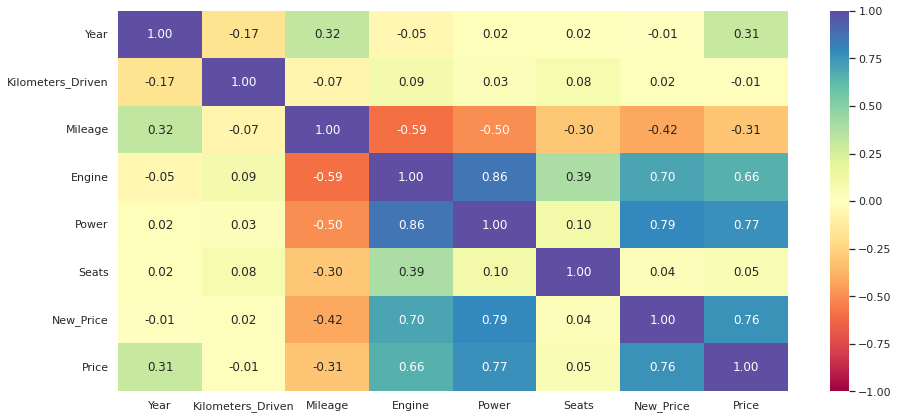

<IPython.core.display.Javascript object>

In [287]:
# Check for correlation among numerical variables after handling all the missing values
num_var = ['Year','Kilometers_Driven','Mileage','Engine','Power', 'Seats','New_Price', 'Price']
corr = df[num_var].corr()
# plot the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

 - correlation between Price and other variables discussed earlier remains same even after handling Missing values.

##Outlier Detection and Treatment

In [288]:
# Read new file without missing values.
data_noMissingValue = pd.read_csv('/content/drive/My Drive/Python Learning/Projects/Project2/used_cars_data_NoMissing.csv')
# checking the shape of the data
print(f"There are {data_noMissingValue.shape[0]} rows and {data_noMissingValue.shape[1]} columns.")  # f-string

There are 6017 rows and 12 columns.


<IPython.core.display.Javascript object>

In [289]:
# Create Copy
df_noMissingValue = data_noMissingValue.copy() #6017 rows and 12 columns

<IPython.core.display.Javascript object>

In [290]:
df_noMissingValue.info() #6017 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6017 entries, 0 to 6016
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6017 non-null   object 
 1   Year               6017 non-null   int64  
 2   Kilometers_Driven  6017 non-null   int64  
 3   Fuel_Type          6017 non-null   object 
 4   Transmission       6017 non-null   object 
 5   Owner_Type         6017 non-null   object 
 6   Mileage            6017 non-null   float64
 7   Engine             6017 non-null   float64
 8   Power              6017 non-null   float64
 9   Seats              6017 non-null   float64
 10  New_Price          6017 non-null   float64
 11  Price              6017 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 564.2+ KB


<IPython.core.display.Javascript object>

In [291]:
df_noMissingValue.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6017.0,2013.358152,3.269967,1998.00,2011.00,2014.00,2016.00,2019.00
Kilometers_Driven,6017.0,58742.282034,91283.745583,171.00,34000.00,53000.00,73000.00,6500000.00
Mileage,6017.0,18.134961,4.582289,0.00,15.17,18.15,21.10,33.54
Engine,6017.0,1620.737078,599.398319,624.00,1198.00,1493.00,1969.00,5998.00
Power,6017.0,112.902114,53.282014,34.20,78.00,97.70,138.03,560.00
Seats,6017.0,5.276882,0.806464,0.00,5.00,5.00,5.00,10.00
New_Price,6017.0,21.500754,24.336731,3.91,7.88,11.30,21.77,375.00
Price,6017.0,9.478340,11.189605,0.44,3.50,5.64,9.95,160.00


<IPython.core.display.Javascript object>

### Outlier Detection

Some of the commonly methods to deal with the data points that we actually flag as outliers are:

* Replacement with null values - We can consider these data points as missing data and replace the abnormal values with NaNs.
* IQR method - Replace the data points with the lower whisker (Q1 - 1.5 * IQR) or upper whisker (Q3 + 1.5 * IQR) value.
* We can also drop these observations, but we might end up with losing other relevant observations as well.

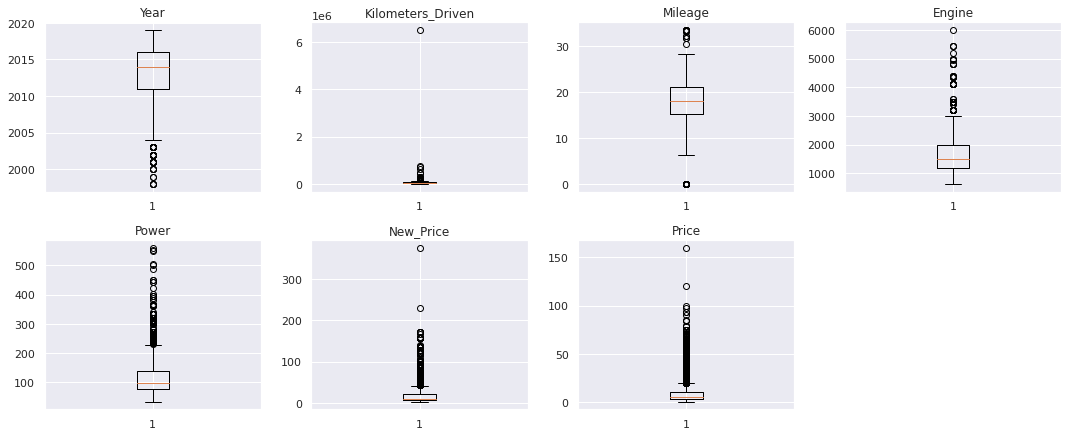

<IPython.core.display.Javascript object>

In [292]:
# outlier detection using boxplot
# selecting the numerical columns of data and adding their names in a list 
numeric_columns = ['Year', 'Kilometers_Driven','Mileage','Engine', 'Power' , 'New_Price','Price']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df_noMissingValue[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [293]:
# to find the 25th percentile and 75th percentile for the numerical columns.
Q1 = df_noMissingValue[numeric_columns].quantile(0.25)
Q3 = df_noMissingValue[numeric_columns].quantile(0.75)

IQR = Q3 - Q1                   #Inter Quantile Range (75th percentile - 25th percentile)

lower_whisker = Q1 - 1.5*IQR    #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper_whisker = Q3 + 1.5*IQR

<IPython.core.display.Javascript object>

In [294]:
# Percentage of outliers in each column
((df_noMissingValue[numeric_columns] < lower_whisker) | (df_noMissingValue[numeric_columns] > upper_whisker)).sum()/df_noMissingValue.shape[0]*100

Year                  0.830979
Kilometers_Driven     3.357155
Mileage               1.362805
Engine                1.013794
Power                 3.972079
New_Price            15.356490
Price                11.932857
dtype: float64

<IPython.core.display.Javascript object>

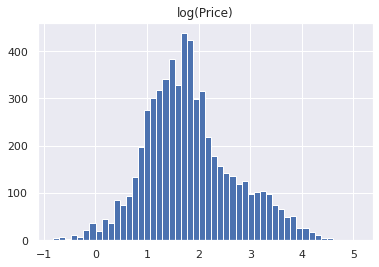

<IPython.core.display.Javascript object>

In [295]:
# Checking log transformation for Price. 
plt.hist(np.log(df_noMissingValue['Price'] ), 50)
plt.title('log(Price)')
plt.show()

* Price and New_Price- The selling price of car depends upon various factors (for example mileage,Year, power of a car) and the prices can change from time to time. Hence, the selling price of car can be considered as genuine values and not outliers.
* Kilometers_Driven max value seems to be vary high. We can consider doing outlier treatment. 
* For all other values, the % is less and they may not need outlier treatment.

###**Treating outliers**

We will cap/clip the minimum and maximum value of these columns to the lower and upper whisker value of the boxplot found using  **Q1 - 1.5*IQR** and **Q3 + 1.5*IQR**, respectively.

**Creating a function to floor and cap/clip outliers in a column**

In [296]:
def treat_outliers(df_noMissingValue, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df_noMissingValue[col].quantile(0.25)  # 25th quantile
    Q3 = df_noMissingValue[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1                # Inter Quantile Range (75th perentile - 25th percentile)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # all the values smaller than lower_whisker will be assigned the value of lower_whisker
    # all the values greater than upper_whisker will be assigned the value of upper_whisker
    # the assignment will be done by using the clip function of NumPy
    df_noMissingValue[col] = np.clip(df_noMissingValue[col], lower_whisker, upper_whisker)

    return df_noMissingValue

<IPython.core.display.Javascript object>

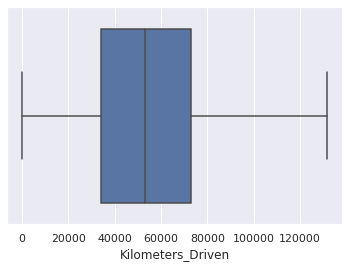

<IPython.core.display.Javascript object>

In [297]:
df_noMissingValue = treat_outliers(df_noMissingValue,'Kilometers_Driven')

# visualizing the column after outlier treatment
sns.boxplot(data=df_noMissingValue,x='Kilometers_Driven')
plt.show()

In [298]:
# saving the dataset with all the missing values treated
df_noMissingValue.to_csv('/content/drive/My Drive/Python Learning/Projects/Project2/used_cars_data_NoOutliers.csv',index=False)

<IPython.core.display.Javascript object>

##Feature Engineering

- Don't see need to reduce any column. All the column data can be handled. Skipping Feature Engineering

# **Model building - Linear Regression**

In [299]:
# Read new file without missing values.
data_noOutliers = pd.read_csv('/content/drive/My Drive/Python Learning/Projects/Project2/used_cars_data_NoOutliers.csv')
# checking the shape of the data
print(f"There are {data_noOutliers.shape[0]} rows and {data_noOutliers.shape[1]} columns.")  # f-string

There are 6017 rows and 12 columns.


<IPython.core.display.Javascript object>

In [300]:
# Create Copy
df_noOutliers = data_noOutliers.copy() #6017 rows and 12 columns

<IPython.core.display.Javascript object>

In [301]:
df_noOutliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6017 entries, 0 to 6016
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6017 non-null   object 
 1   Year               6017 non-null   int64  
 2   Kilometers_Driven  6017 non-null   float64
 3   Fuel_Type          6017 non-null   object 
 4   Transmission       6017 non-null   object 
 5   Owner_Type         6017 non-null   object 
 6   Mileage            6017 non-null   float64
 7   Engine             6017 non-null   float64
 8   Power              6017 non-null   float64
 9   Seats              6017 non-null   float64
 10  New_Price          6017 non-null   float64
 11  Price              6017 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 564.2+ KB


<IPython.core.display.Javascript object>

In [302]:
df_noOutliers.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6017.0,2013.358152,3.269967,1998.00,2011.00,2014.00,2016.00,2019.00
Kilometers_Driven,6017.0,56109.923716,30045.110970,171.00,34000.00,53000.00,73000.00,131500.00
Mileage,6017.0,18.134961,4.582289,0.00,15.17,18.15,21.10,33.54
Engine,6017.0,1620.737078,599.398319,624.00,1198.00,1493.00,1969.00,5998.00
Power,6017.0,112.902114,53.282014,34.20,78.00,97.70,138.03,560.00
Seats,6017.0,5.276882,0.806464,0.00,5.00,5.00,5.00,10.00
New_Price,6017.0,21.500754,24.336731,3.91,7.88,11.30,21.77,375.00
Price,6017.0,9.478340,11.189605,0.44,3.50,5.64,9.95,160.00


<IPython.core.display.Javascript object>

In [303]:
# Since this is Linear regression using Supervised learning - find depdendent variable (in this case we want to find Price for used car) and indepdent variable.
X = df_noOutliers.drop(['Price'],  axis=1)
y = df_noOutliers["Price"]

# Using Log Version of Price for checking model performance. Please check observations for performance in https://colab.research.google.com/drive/1Tp3-QNJ074kigeUZMsAzFtKEbsrAHpGe#scrollTo=B3BdmAAFCROy&line=1&uniqifier=1
#X = df_noOutliers.drop(['Price_logVersion', 'Price'],  axis=1)
#y = df_noOutliers["Price_logVersion"]

<IPython.core.display.Javascript object>

In [304]:
#Performing one hot encoding for string variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object"]).columns.tolist(),
    drop_first=True,
)

X.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000.0,26.60,998.0,58.16,5.0,5.51,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,2015,41000.0,19.67,1582.0,126.20,5.0,16.06,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0
2,2011,46000.0,18.20,1199.0,88.70,5.0,8.61,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,2012,87000.0,20.77,1248.0,88.76,7.0,11.27,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,2013,40670.0,15.20,1968.0,140.80,5.0,53.14,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [305]:
# splitting the data in 70:30 ratio for train to test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

<IPython.core.display.Javascript object>

In [306]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 4211
Number of rows in test data = 1806


<IPython.core.display.Javascript object>

#### Fit Linear Model

In [307]:
# intialize the model to be fit and fit the model on the train data

l_regression_model = LinearRegression()
l_regression_model.fit(X_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

# **Model performance evaluation**

In [308]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

#### **Calculations here are based on Log version of Price. This is just to check what happens when log is used for Price**

In [309]:
# Checking model performance on train set with Log Value of Price
print("Training Performance with Log Value of Price\n")
lin_reg_model_train_perf = model_performance_regression(l_regression_model, X_train, y_train)
lin_reg_model_train_perf

Training Performance with Log Value of Price



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,5.447001,3.186901,0.766537,0.765199,64.752309


<IPython.core.display.Javascript object>

In [310]:
# Checking model performance on test set with Log Value of Price
print("Test Performance with Log Value of Price\n")
lin_reg_model_test_perf = model_performance_regression(l_regression_model, X_test, y_test)
lin_reg_model_test_perf

Test Performance with Log Value of Price



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,5.391342,3.012906,0.759295,0.756052,60.631715


<IPython.core.display.Javascript object>

- When log version of Proce is considered for Model, $R^2$ has good value. But MAPE is infinite.

#### **Calculations here are based on actual Price. Observations and Conclusions are based on this**

In [311]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(l_regression_model, X_train, y_train)
lin_reg_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,5.447001,3.186901,0.766537,0.765199,64.752309


<IPython.core.display.Javascript object>

In [312]:
# Checking model performance
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(l_regression_model, X_test, y_test)
lin_reg_model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,5.391342,3.012906,0.759295,0.756052,60.631715


<IPython.core.display.Javascript object>

# **Observations & Recommendations**


#### **Observations**

We analyzed a dataset for used car prices. Following are conclusions based on Model -  

1. There train and test $R^2$ are 0.76 and 0.75 respectively.This indicates that the model explains 76% and 75% of the total variation in the train and test sets. 
2. RMSE values on train and test sets are also comparable.
3. This shows that model is not overfitting.
4. MAPE of 60.63 on test data means that we are able to predict within ~61% of price value. 



#### **Recommendations**

1. Based on this predictive model, Cars4U start-up can predict price for old cars with $R^2$ of 0.76 on training data set. 
2. There were many rows in dataset with missing value for Price (1234). If these values can be captured, this odel can perform better.
3. Cars4U can use this model for predicting used car values with mean error of 3 on the test data set. 
4. Missing value treatment (Price, Power, Seats, Engine ) amd outier detaction and treatment (Kilometers_Driven) helped achieve better prediction for model.
5. Cars4U can also use EDA from this analysis to find pattern and market for old cars. 


